# Analyzing exam scores

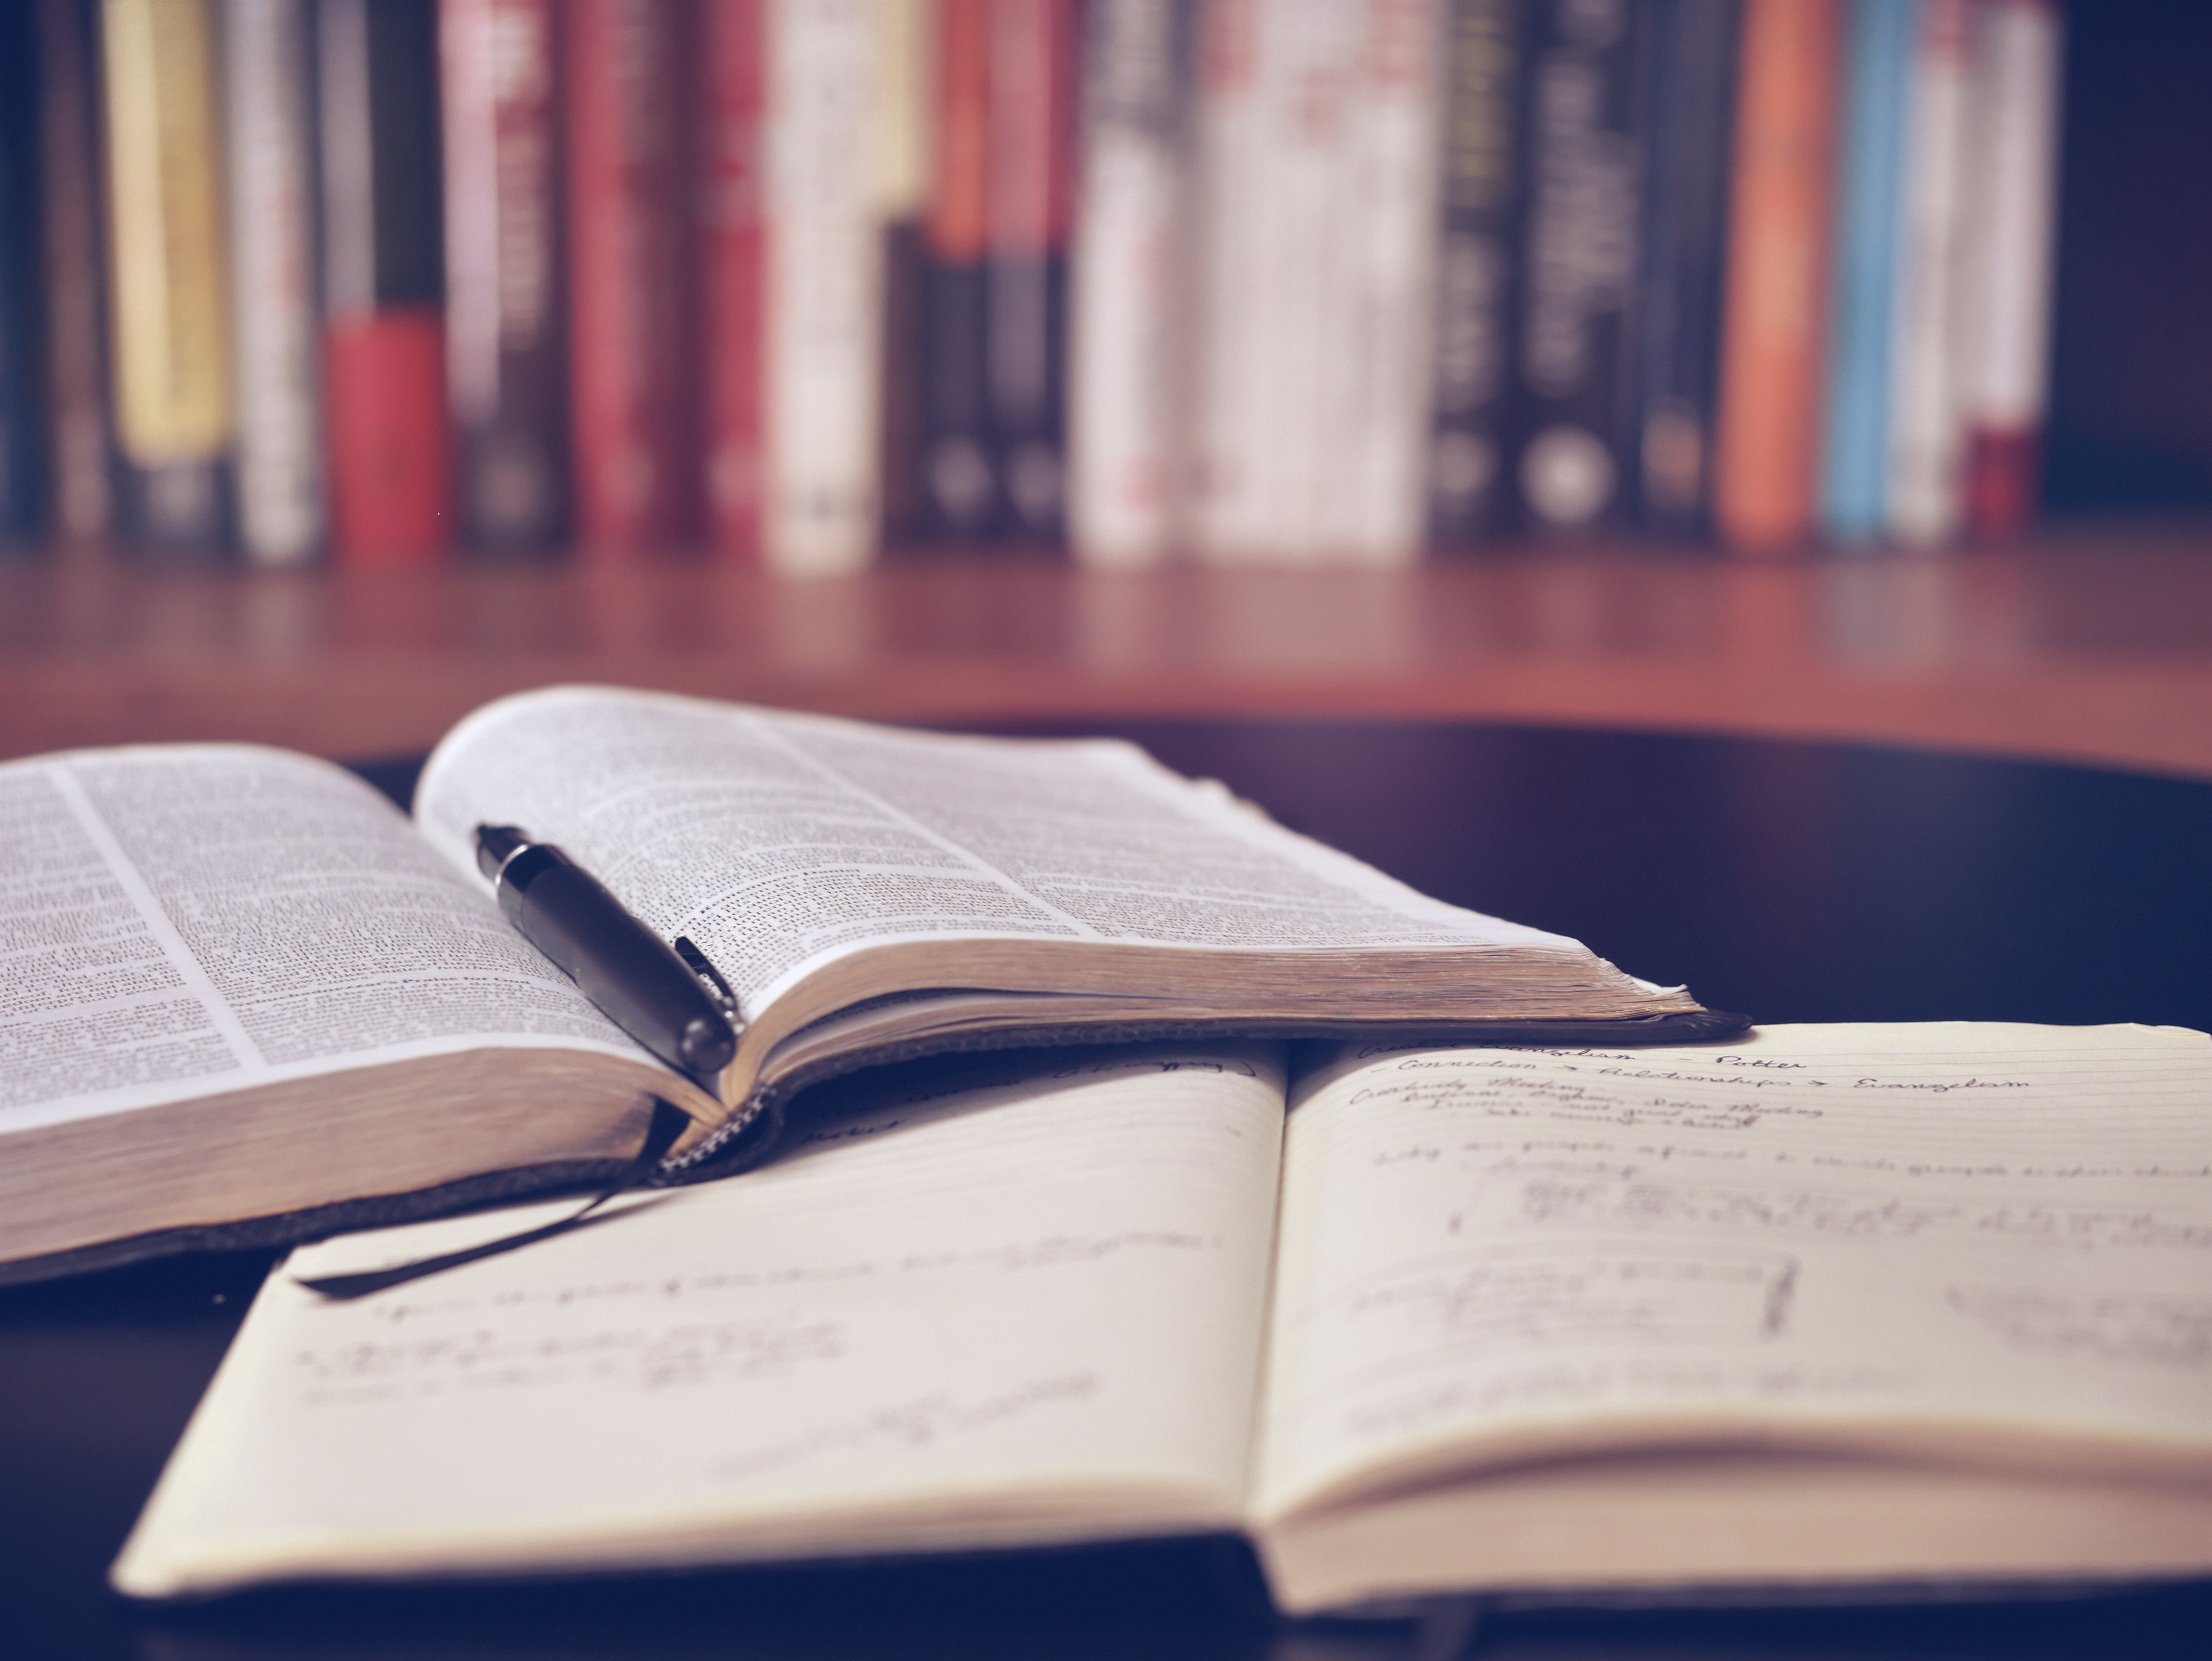
Photo by <a href="https://unsplash.com/@aaronburden?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Aaron Burden</a> on <a href="https://unsplash.com/s/photos/studying?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

## 📖 Background
Your best friend is an administrator at a large school. The school makes every student take year-end math, reading, and writing exams.

Since you have recently learned data manipulation and visualization, you suggest helping your friend analyze the score results. The school's principal wants to know if test preparation courses are helpful. She also wants to explore the effect of parental education level on test scores. 

## 💾 The data

#### The file has the following fields ([source](http://roycekimmons.com/tools/generated_data/exams)):
- "gender" - male / female
- "race/ethnicity" - one of 5 combinations of race/ethnicity
- "parent_education_level" -  highest education level of either parent
- "lunch" - whether the student receives free/reduced or standard lunch
- "test_prep_course" - whether the student took the test preparation course
- "math" -  exam score in math 
- "reading" -  exam score in reading 
- "writing" -  exam score in writing 

## 💪 Challenge
Create a report to answer the principal's questions. Include:

1. What are the average reading scores for students with/without the test preparation course?
2. What are the average scores for the different parental education levels?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).
5. [Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores. 
6. Summarize your findings.

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Importing the data
Loading in the data, it appears to be well organized containing 1,000 student records. There are five ‘race/ethnicity’ groups assigned to male or female students. Math, reading, and writing scores have a maximum score of 100 and average scores of 66.09, 69.17, and 68.05 respectively.

In [2]:
df = pd.read_csv('data/exams.csv')
df.head()

gender race/ethnicity parent_education_level         lunch  \
0  female        group B      bachelor's degree      standard   
1  female        group C           some college      standard   
2  female        group B        master's degree      standard   
3    male        group A     associate's degree  free/reduced   
4    male        group C           some college      standard   

  test_prep_course  math  reading  writing  
0             none    72       72       74  
1        completed    69       90       88  
2             none    90       95       93  
3             none    47       57       44  
4             none    76       78       75

In [3]:
df.describe(include='all').round(2)

gender race/ethnicity parent_education_level     lunch  \
count     1000           1000                   1000      1000   
unique       2              5                      6         2   
top     female        group C           some college  standard   
freq       518            319                    226       645   
mean       NaN            NaN                    NaN       NaN   
std        NaN            NaN                    NaN       NaN   
min        NaN            NaN                    NaN       NaN   
25%        NaN            NaN                    NaN       NaN   
50%        NaN            NaN                    NaN       NaN   
75%        NaN            NaN                    NaN       NaN   
max        NaN            NaN                    NaN       NaN   

       test_prep_course     math  reading  writing  
count              1000  1000.00  1000.00  1000.00  
unique                2      NaN      NaN      NaN  
top                none      NaN      NaN      NaN  
freq                642      NaN      NaN      NaN  
mean                NaN    66.09    69.17    68.05  
std                 NaN    15.16    14.60    15.20  
min                 NaN     0.00    17.00    10.00  
25%                 NaN    57.00    59.00    57.75  
50%                 NaN    66.00    70.00    69.00  
75%                 NaN    77.00    79.00    79.00  
max                 NaN   100.00   100.00   100.00

## Missing values
The data does not have any missing values, no pre-processing is required.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  1000 non-null   object
 1   race/ethnicity          1000 non-null   object
 2   parent_education_level  1000 non-null   object
 3   lunch                   1000 non-null   object
 4   test_prep_course        1000 non-null   object
 5   math                    1000 non-null   int64 
 6   reading                 1000 non-null   int64 
 7   writing                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isnull().sum()

gender                    0
race/ethnicity            0
parent_education_level    0
lunch                     0
test_prep_course          0
math                      0
reading                   0
writing                   0
dtype: int64

# What are the average reading scores for students with and without the test preparation course?
Average reading scores for students who have not completed the test preparation course are 10% lower than students that have. The average reading test score for students who have completed the course is **73.89 vs. 66.53** that have not.

In [6]:
# Creating separate data frame with average mean by test_prep_course completion
read_prep = df.groupby('test_prep_course').agg(avg_reading=('reading', 'mean')).round(4)

# Add percent change column
read_prep['pct_change'] = read_prep.pct_change().round(4)

read_prep

avg_reading  pct_change
test_prep_course                         
completed             73.8939         NaN
none                  66.5343     -0.0996

### Visual: Average reading scores by test prep course completion

In [7]:
# Vizualize average reading scores by test_prep_course completion
fig = px.box(df, x='reading', y='test_prep_course', color='test_prep_course')

# Update titles and remove legend
fig.update_layout(
    showlegend=False,
    title='Average reading scores by test prep course completion',
    xaxis_title='<b>reading</b> scores',
    yaxis_title='test preparation course')

# Show graph
fig.show()

# What are the average scores for the different parental education levels? 
The general trend appears to be that average scores increase as the student’s parental education level increases. Interestingly, the lowest average scores belong to the students of parents with a high school education, not of those with some high school. Students with parents that possess a master’s degree performed the highest across all three subjects. Average math scores are much lower than those of reading and writing.

In [8]:
# Create data frame grouped by parent_education_level
parent_avg = df.groupby('parent_education_level')[['math', 'reading', 'writing']].mean()

# Sort values
parent_avg = parent_avg.sort_values('writing', ascending=False).round(2)

parent_avg.columns.name = 'subject'
parent_avg

subject                  math  reading  writing
parent_education_level                         
master's degree         69.75    75.37    75.68
bachelor's degree       69.39    73.00    73.38
associate's degree      67.88    70.93    69.90
some college            67.13    69.46    68.84
some high school        63.50    66.94    64.89
high school             62.14    64.70    62.45

### Visual: Average subject scores by parent education level

In [9]:
# Visualize avg subject scores by parental education level
fig = px.line(parent_avg, facet_col='subject', markers=True)

# Remove '=' sign from facet titles
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

# Update titles
fig.update_xaxes(title_text='parent education level')
fig.update_layout(title='Average subject scores by parent education level',
                  yaxis_title='<b>average</b> score',
                  showlegend=False)

# Show graph
fig.show()

# Compare the average scores for students with/without the test preparation course for different parental education levels.
Average test scores increased across the board amongst students who have completed the test preparation course, regardless of their parents’ education level. Average math scores increased by the smallest margin, with increases ranging from 1 – 9%. Average writing scores improved the most with average score increases between 8 – 15%; average reading scores ranged from 5 – 13%.

In [10]:
# Create data frame grouped by parent_education_level and test_prep_course
parent_edu = df.groupby(['parent_education_level',
                         'test_prep_course'])[['math', 'reading', 'writing']].mean().unstack()

# Sort values to ensure parent_education_level is ordered properly
parent_edu = parent_edu.sort_values(('writing', 'completed'),
                                    ascending=False).round(2)

parent_edu

math          reading          writing       
test_prep_course       completed   none completed   none completed   none
parent_education_level                                                   
master's degree            70.60  69.31     78.25  73.90     80.10  73.41
bachelor's degree          73.28  66.90     76.74  70.61     78.70  69.99
associate's degree         71.83  65.57     76.17  67.86     76.82  65.84
some college               71.45  64.89     75.99  66.09     76.52  64.87
some high school           66.70  61.08     70.95  63.91     70.36  60.75
high school                65.00  60.99     67.84  63.45     68.05  60.21

{{parent_edu}}

In [11]:
subject_list = ['math', 'reading', 'writing']

for i in subject_list:
    x = (parent_edu[i].pct_change(axis=1) * -100).round(2)
    min_level = x['none'].idxmin()
    max_level = x['none'].idxmax()
    min_improve = x['none'].min()
    max_improve = x['none'].max()
    print('{}: {} has lowest improvement {}%'.format(
        i, min_level, min_improve))
    print('{}: {} has highest improvement {}%\n'.format(
        i, max_level, max_improve))

math: master's degree has lowest improvement 1.83%
math: some college has highest improvement 9.18%

reading: master's degree has lowest improvement 5.56%
reading: some college has highest improvement 13.03%

writing: master's degree has lowest improvement 8.35%
writing: some college has highest improvement 15.22%



### Visual: Average scores by category and test prep

In [12]:
# Initiate subplots
fig = make_subplots(rows=1, cols=2,
                    horizontal_spacing=0.01,
                    shared_yaxes=True,
                    subplot_titles=('course completed', 'not completed'))

# Average scores, by test_prep_course completed
fig.add_trace(go.Scatter(x=parent_edu.index,
                         y=parent_edu['math', 'completed'],
                         name='math',
                         legendgroup='a',
                         line=dict(width=3)),
              row=1, col=1)
fig.add_trace(go.Scatter(x=parent_edu.index,
                         y=parent_edu['reading', 'completed'],
                         name='reading',
                         legendgroup='a',
                         line=dict(width=3)),
              row=1, col=1)
fig.add_trace(go.Scatter(x=parent_edu.index,
                         y=parent_edu['writing', 'completed'],
                         name='writing',
                         legendgroup='a',
                         line=dict(width=3)),
              row=1, col=1)

# Average scores, by test_prep_course not completed
fig.add_trace(go.Scatter(x=parent_edu.index,
                         y=parent_edu['math', 'none'],
                         name='math',
                         legendgroup='b'),
              row=1, col=2)
fig.add_trace(go.Scatter(x=parent_edu.index,
                         y=parent_edu['reading', 'none'],
                         name='reading',
                         legendgroup='b'),
              row=1, col=2)
fig.add_trace(go.Scatter(x=parent_edu.index,
                         y=parent_edu['writing', 'none'],
                         name='writing',
                         legendgroup='b'),
              row=1, col=2)

# Update titles
fig.update_layout(legend_tracegroupgap=50,
                  yaxis_title='<b>average</b> score',
                  title_text='Average scores by category and test prep')
fig.update_xaxes(title_text='parent education level')

# Show graph
fig.show()

# The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores.
It appears that all three subjects are positively correlated; however, reading and writing are very highly correlated. As reading scores increase, writing scores increase and vice versa.

### Visual: Correlation heatmap

In [13]:
fig = px.imshow(df.corr())
fig.show()

# Summary
Based on the 1,000 student records provided, students who have completed the test preparation course showed higher average test scores. Average math scores show the least amount of improvement, with average writing scores saw improvements between 8 - 15%.